## Задание
Используйте файл с информацией о ноутбуках `laptops_na.csv`.

[Источник данных](https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset)


В нём содержаться следующие переменные:

- `brand`: Название бренда ноутбука.
- `Model`: Конкретная модель или серия ноутбука.
- `Price`: Цена ноутбука в индийских рупиях.
- `Rating`: Рейтинг, присвоенный ноутбуку на основе его характеристик.
- `processor_brand`: Марка процессора, используемого в ноутбуке.
- `processor_tier`: Уровень производительности или категория процессора.
- `num_cores`: Количество вычислительных ядер в процессоре.
- `num_threads`: Количество потоков, поддерживаемых процессором.
- `ram_memory`: Объем оперативной памяти, используемый в ноутбуке.
- `primary_storage_type`: Тип основного хранилища (например, HDD, SSD).
- `primary_storage -apacity`: Емкость основного хранилища ноутбука.
- `secondary_storage_type`: Тип вторичного хранилища, если оно доступно.
- `secondary_storage_capacity`: Емкость вторичного хранилища ноутбука.
- `gpu_brand`: Марка графического процессора (GPU).
- `gpu_type`: Тип графического процессора.
- `is_touch_screen`: Указывает, оснащен ли ноутбук функцией сенсорного экрана.
- `display_size`: Размер дисплея ноутбука в дюймах.
- `resolution_width`: Разрешение по ширине дисплея.
- `resolution_height`: Разрешение дисплея по высоте.
- `OS`: Установленная на ноутбуке операционная система.
- `year_of_warranty`: Срок гарантии, предоставляемой на ноутбук, обычно в годах.

### Задание 1. Проверка отличия распределения от «нормального»

Проанализируйте распределение значений 5-ти любых метрических переменных. Проведите тест для проверки того отличается ли распределение значений переменных от нормального распределения. Сформулируйте гипотезы и выводы по результатам анализа. Постройте гистограммы распределения с наложенной кривой нормального распределения.

In [ ]:
import pandas as pd
data = pd.read_csv('laptops_na.csv')
print(data.shape)
data.describe()

(991, 22)


,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,933.000000,942.000000,936.000000,958.000000,953.000000,942.000000,928.000000,942.000000,943.000000,938.000000,931.000000
mean,509.301179,76964.924628,63.963675,8.076200,12.178384,13.016985,608.758621,3.125265,15.175186,2005.496802,1181.117078
std,285.899845,56821.995229,10.174770,4.183792,5.631513,5.558856,264.650978,27.815989,0.933898,358.089277,265.572780
min,1.000000,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,266.000000,43547.500000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,512.000000,61706.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,752.000000,88997.500000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1000.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,256.000000,18.000000,3840.000000,2560.000000


Выбираем столбцы и считаем пропуски. Их необходимо будет убрать


In [ ]:
columns = ['Price', 'Rating', 'ram_memory', 'display_size', 'primary_storage_capacity']
data[columns].isna().sum()


,0
Price,49
Rating,55
ram_memory,49
display_size,48
primary_storage_capacity,63


Убрали пустые ячейки


In [ ]:
data_picked = data[columns]
data_picked = data_picked.dropna()
data_picked.shape

(754, 5)

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


1.   Гипотеза H0 - распределение признака - нормальное
2.   Гипотеза H1 - распределение признака отличается от нормального



In [ ]:
price_data = data_picked['Price']
stat, p_value = stats.shapiro(price_data)
print(f"статистика Шапиро-Уилка: {stat}")
print(f"p-value: {p_value}")
if p_value > 0.05:
    print("Распределение переменной Price похоже на нормальное")
else:
    print("Распределение переменной Price не похоже на нормальное")

статистика Шапиро-Уилка: 0.7328973324045396
p-value: 4.7273270179898435e-33
Распределение переменной Price не похоже на нормальное


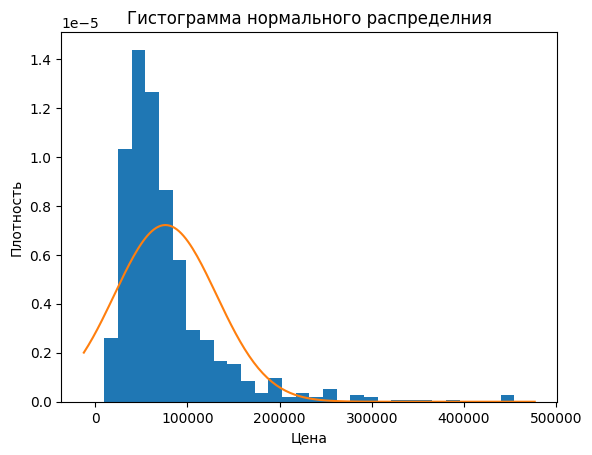

In [ ]:
mu = price_data.mean()
sigma = price_data.std()
plt.hist(price_data, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Гистограмма нормального распределния')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.show()


Делаем вывод, что цена не распределена нормально.

In [ ]:
rating_data = data_picked['Rating']
stat, p_value = stats.shapiro(rating_data)
print(f"статистика Шапиро-Уилка: {stat}")
print(f"p-value: {p_value}")
if p_value > 0.05:
    print("Распределение переменной Rating похоже на нормальное")
else:
    print("Распределение переменной Rating не похоже на нормальное")

статистика Шапиро-Уилка: 0.9899003068014187
p-value: 3.430989969256786e-05
Распределение переменной Price не похоже на нормальное


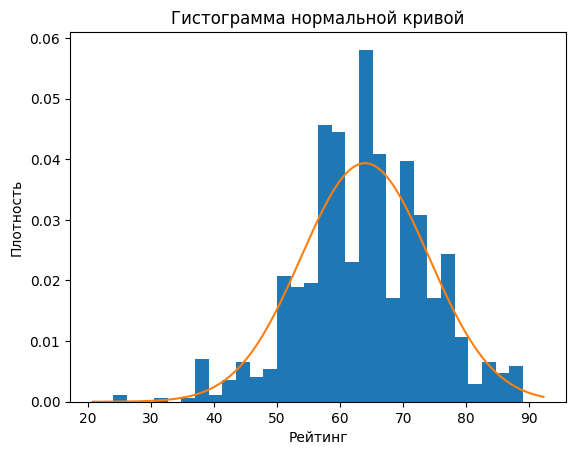

In [ ]:
mu = rating_data.mean()
sigma = rating_data.std()
plt.hist(rating_data, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Гистограмма нормальной кривой')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность')
plt.show()


Видно, что рейтинг ближе к нормальному распределению, но видны странные "проталины" посередине

Таким образом, распределение рейтинга также не похоже на нормальное

In [ ]:
ram_data = data_picked['ram_memory']
stat, p_value = stats.shapiro(ram_data)
print(f"статистика Шапиро-Уилка: {stat}")
print(f"p-value: {p_value}")
if p_value > 0.05:
    print("Распределение переменной ram_memory похоже на нормальное")
else:
    print("Распределение переменной ram_memory не похоже на нормальное")

статистика Шапиро-Уилка: 0.7213038314200431
p-value: 4.5633845630846804e-34
Распределение переменной Price не похоже на нормальное


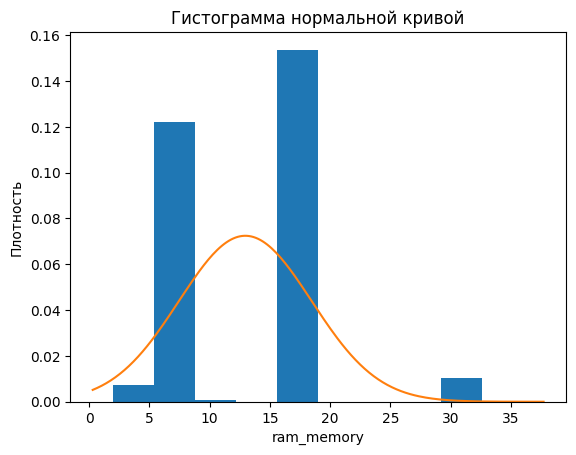

In [ ]:
mu = ram_data.mean()
sigma = ram_data.std()
plt.hist(ram_data, bins=10, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Гистограмма нормальной кривой')
plt.xlabel('ram_memory')
plt.ylabel('Плотность')
plt.show()

Видно, что в основном 2 типа объема оперативной памяти

Распределение памяти тоже не нормальное

In [ ]:
disp_data = data_picked['display_size']
stat, p_value = stats.shapiro(disp_data)
print(f"статистика Шапиро-Уилка: {stat}")
print(f"p-value: {p_value}")
if p_value > 0.05:
    print("Распределение переменной display_size похоже на нормальное")
else:
    print("Распределение переменной display_size не похоже на нормальное")

статистика Шапиро-Уилка: 0.7888667325840444
p-value: 1.4544657228535065e-30
Распределение переменной Price не похоже на нормальное


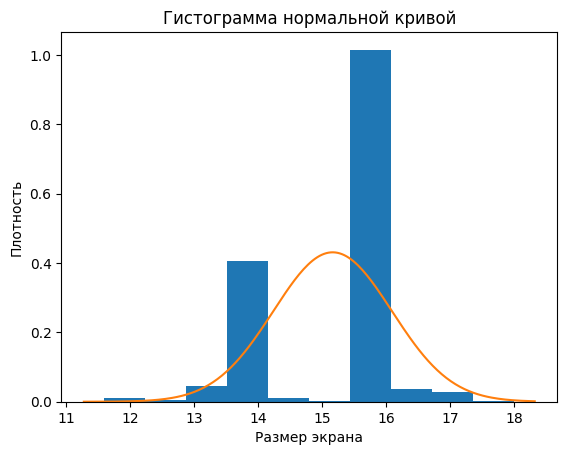

In [ ]:
mu = disp_data.mean()
sigma = disp_data.std()
plt.hist(disp_data, bins=10, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Гистограмма нормальной кривой')
plt.xlabel('Размер экрана')
plt.ylabel('Плотность')
plt.show()

Видно, что один размер экрана преобладает над другими

Размер экрана тоже не распределен нормально

In [ ]:
storage_data = data_picked['primary_storage_capacity']
stat, p_value = stats.shapiro(storage_data)
print(f"статистика Шапиро-Уилка: {stat}")
print(f"p-value: {p_value}")
if p_value > 0.05:
    print("Распределение переменной primary_storage_capacity похоже на нормальное")
else:
    print("Распределение переменной primary_storage_capacity не похоже на нормальное")

статистика Шапиро-Уилка: 0.6516317606081912
p-value: 1.5665823346241795e-36
Распределение переменной Price не похоже на нормальное


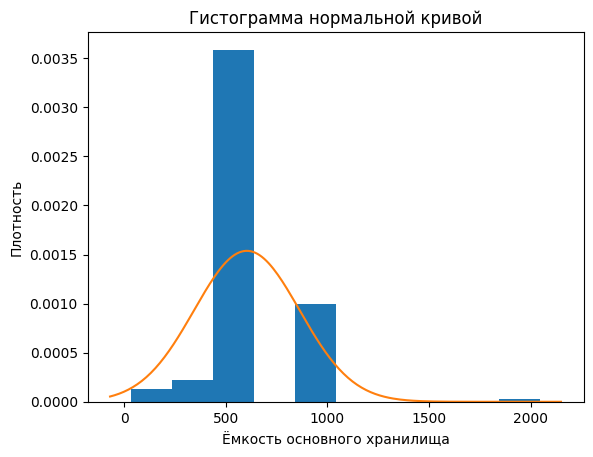

In [ ]:
mu = storage_data.mean()
sigma = storage_data.std()
plt.hist(storage_data, bins=10, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Гистограмма нормальной кривой')
plt.xlabel('Ёмкость основного хранилища')
plt.ylabel('Плотность')
plt.show()

Видно, что один размер преобладает над другими

Ёмкость основного хранилища также не распределена нормально.

### Задание 2. Тест Хи-квадрат

Проведите тест Хи-квадрат не менее, чем с двумя парами переменных, для которых он применим. Можно использовать как исходные переменные, так и перекодировать их. Постройте для выбранных пар переменных таблицы сопряженности и прокомментируйте их. Сформулируйте гипотезы. Интерпретируйте результаты анализа. Обоснуйте свои выводы. Визуализируйте наблюдаемые тенденции на подходящих графиках.

Выберем сначала brand x processor_brand и создадим таблицу сопряженности ожидаемых частот. Гипотеза H1: brand и processor_band имеют зависимость
H0: не имеют зависимости

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
data_picked_chi = data.dropna(subset=['brand', 'processor_brand'])[['brand', 'processor_brand']]
cross_table = pd.crosstab(data_picked_chi['brand'], data_picked_chi['processor_brand'])
cross_table

processor_brand,amd,apple,intel,other
brand,,,,
acer,16,0,66,0
apple,0,13,0,0
asus,54,0,130,0
avita,2,0,3,0
axl,0,0,2,0
chuwi,0,0,3,0
dell,12,0,77,0
fujitsu,1,0,4,0
gigabyte,0,0,2,0


In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_table)
expected_df = pd.DataFrame(expected, index=cross_table.index, columns=cross_table.columns)

print("Ожидаемые частоты:")
print(expected_df)

Ожидаемые частоты:
processor_brand        amd     apple       intel     other
brand                                                     
acer             21.798643  1.205882   58.624434  0.371041
apple             3.455882  0.191176    9.294118  0.058824
asus             48.914027  2.705882  131.547511  0.832579
avita             1.329186  0.073529    3.574661  0.022624
axl               0.531674  0.029412    1.429864  0.009050
chuwi             0.797511  0.044118    2.144796  0.013575
dell             23.659502  1.308824   63.628959  0.402715
fujitsu           1.329186  0.073529    3.574661  0.022624
gigabyte          0.531674  0.029412    1.429864  0.009050
honor             0.531674  0.029412    1.429864  0.009050
hp               48.914027  2.705882  131.547511  0.832579
iball             0.265837  0.014706    0.714932  0.004525
infinix           2.924208  0.161765    7.864253  0.049774
jio               0.265837  0.014706    0.714932  0.004525
lenovo           48.382353  2.676471 

Видно, что в данном случае нельзя провести тест Хи-квадрат, так как слишком много ячеек с значением ожидаемой частоты < 5. Сделаем некий feature engineering: Оставим топ 6 встречаемых брендов процессоров (видно, что преобладающих 6), а остальные закинем в other_brands, аналогично для брендов процессора выделим основные amd и intel

In [ ]:
major_brands = ['acer', 'asus', 'dell', 'hp', 'lenovo', 'msi']

data_picked_chi['brand_grouped'] = data_picked_chi['brand'].apply(
    lambda x: x if x in major_brands else 'other_brands'
)
data_picked_chi['processor_brand_grouped'] = data_picked_chi['processor_brand'].apply(
    lambda x: x if x in ['amd', 'intel'] else 'other_brands'
)

# Проверим, что всё ок:
data_picked_chi['brand_grouped'].value_counts()

,count
brand_grouped,
hp,184
asus,184
lenovo,182
dell,89
other_brands,82
acer,82
msi,81


In [ ]:
table_grouped = pd.crosstab(
    data_picked_chi['brand_grouped'],
    data_picked_chi['processor_brand_grouped']
)
print(table_grouped)

processor_brand_grouped  amd  intel  other_brands
brand_grouped                                    
acer                      16     66             0
asus                      54    130             0
dell                      12     77             0
hp                        66    117             1
lenovo                    67    115             0
msi                       14     67             0
other_brands               6     60            16


Видно, что other_brands слишком мало, чтобы считать Хи-тест, так что уберем их

In [ ]:
data_picked_chi = data_picked_chi[(data_picked_chi['processor_brand_grouped'] != 'other_brands')]

In [ ]:
table_grouped = pd.crosstab(
    data_picked_chi['brand_grouped'],
    data_picked_chi['processor_brand_grouped']
)
print(table_grouped)

processor_brand_grouped  amd  intel
brand_grouped                      
acer                      16     66
asus                      54    130
dell                      12     77
hp                        66    117
lenovo                    67    115
msi                       14     67
other_brands               6     60


In [ ]:
chi2, p, dof, expected = chi2_contingency(table_grouped)
expected_df = pd.DataFrame(expected,
                           index=table_grouped.index,
                           columns=table_grouped.columns)
print(expected_df)
print("\nМинимальная ожидаемая частота:", expected_df.min().min())

processor_brand_grouped        amd       intel
brand_grouped                                 
acer                     22.226067   59.773933
asus                     49.873126  134.126874
dell                     24.123414   64.876586
hp                       49.602076  133.397924
lenovo                   49.331027  132.668973
msi                      21.955017   59.044983
other_brands             17.889273   48.110727

Минимальная ожидаемая частота: 17.889273356401382


Можно считать тест Хи-квадрат!

In [ ]:
chi2, p, df, expected = chi2_contingency(table_grouped)
print(f"статистика Хи-квадрат: {chi2}")
print(f"степень свободы: {df}")

статистика Хи-квадрат: 42.131536747566805
степень свободы: 6


Используем калькулятор https://di-mgt.com.au/chisquare-calculator.html
для проверки гипотез.

В итоге для уровня значимости p = 0.05 и для степеней свободы df = 6 для принятия H0 гипотезы Хи-квадрат значение должно быть <= 12.59, у нас же оно явно больше (42.1) , поэтому H0 гипотеза отклоняется. Причем Хи-квадрат настолько большой, что даже при уровне значимости p = 0.000001 H0 гипотеза все равно бы отклонялась.

Итог: между брендом компьютера и брендом существует зависимость

Теперь выберем пару is_touch_screen и gpu_type

H0 - между ними нет зависимости

H1 - между ними есть зависимость

In [ ]:
data.columns

Index(['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

In [ ]:
picked_data = data.dropna(subset=['is_touch_screen', 'gpu_type'])[['is_touch_screen', 'gpu_type']]
cross_table = pd.crosstab(picked_data['is_touch_screen'], picked_data['gpu_type'])
cross_table

gpu_type,apple,dedicated,integrated
is_touch_screen,,,
False,14,309,495
True,0,9,72


Нельзя использовать в тесте Хи-квадрат, так как в наблюдамых частотах apple -> true = 0 => уберем эппл, так как слишком мало данных для выборки

In [ ]:
picked_data = picked_data[picked_data['gpu_type'] != 'apple']
cross_table = pd.crosstab(picked_data['is_touch_screen'], picked_data['gpu_type'])
cross_table

gpu_type,dedicated,integrated
is_touch_screen,,
False,309,495
True,9,72


In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_table)
expected_df = pd.DataFrame(expected,
                           index=cross_table.index,
                           columns=cross_table.columns)
print(expected_df)
print("\nМинимальная ожидаемая частота:", expected_df.min().min())

gpu_type          dedicated  integrated
is_touch_screen                        
False            288.894915  515.105085
True              29.105085   51.894915

Минимальная ожидаемая частота: 29.105084745762714


Минимальная ожидаемая частота 29 => можем использовать тест Хи-квадрат.

In [ ]:
chi2, p, df, expected = chi2_contingency(cross_table)
print(f"статистика Хи-квадрат: {chi2}")
print(f"степень свободы: {df}")

статистика Хи-квадрат: 22.689034394592582
степень свободы: 1


По калькулятору для уровня значимости p = 0.00001 достаточно Хи-квадрат равного 19.51, а у нас 22.69 => Зависимость среди gpu_type и is_touch_screen существует и H0 гипотеза отвергается.

### Задание 3. Парная корреляция

Проведите корреляционный анализ переменных (нужно рассмотреть не менее трёх разных пар переменных). Обоснуйте выбор рассчитываемых коэффициентов корреляции. Сформулируйте гипотезы. Визуализируйте наблюдаемые тенденции на подходящих графиках. Интерпретируйте результаты анализа (статистическая значимость, сила и направление взаимосвязи). Заполните таблицу (не менее 3 записей).

| Анализируемые пары переменных | Выбранный коэффициент корреляции (обоснование выбора) | Гипотезы | Сила взаимосвязи | Направление взаимосвязи | Статистическая значимость взаимосвязи |

|Pice, ram_memory| Спирмен ( метрические, не нормальное распределение) | H0 - связи нет, H1 - связь есть | Сильная | Прямая связь | статистически значимая |

|display_size, Rating | Спирмен (метрические, Rating не распр. нормально) | H0 - связи нет, H1 - связь есть | Умеренная | Прямая связь | статистически значимая |

|Price, Rating | Спирмен (метрические, не норм. распр.) | H0 - связи нет, H1 - связь есть | Сильная | прямая связь | статистически значимая |



Сначала выберем пару Price и ram_memory

Построим диаграмму рассеивания.

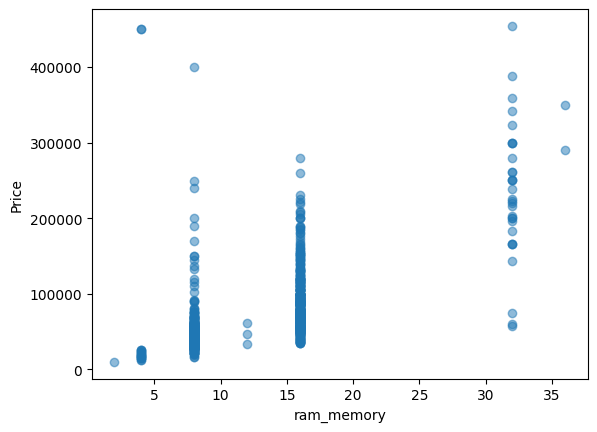

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['ram_memory'], data['Price'], alpha=0.5)
plt.xlabel('ram_memory')
plt.ylabel('Price')
plt.show()


Убеждаемся в каком-то наличии взаимосвязи


Выбираем коэфф кореляции Спирмена, так как переменные метрические и вначале доказали, что они имеют не нормальное распределение.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
picked_data = data.dropna(subset = ['Price', 'ram_memory'])[['Price', 'ram_memory']]
corr, p_value = spearmanr(picked_data['Price'], picked_data['ram_memory'])

print(f"Корреляция Спирмена: {corr}")
print(f"p-value: {p_value}")

Корреляция Спирмена: 0.6805341306535431
p-value: 9.566265422023609e-123


интерпретируем по таблице и получаем сильную связь. То есть увеличение объема оперативной памяти связано с ростом цены.

p < 0.05 => статистически значимая связь, знак корреляции > 0 => прямая

Переходим к паре display_size и Rating

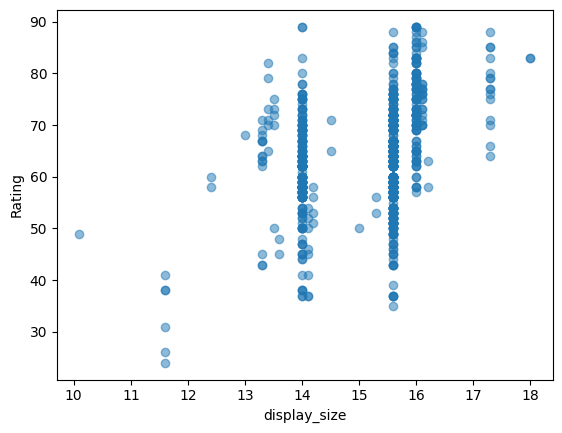

In [ ]:
plt.scatter(data['display_size'], data['Rating'], alpha=0.5)
plt.xlabel('display_size')
plt.ylabel('Rating')
plt.show()

Убеждаемся в наличии какой-то зависимости

Выбираем коэффициент Спирмена, так как обе переменные метрические, но Rating не распр. нормально

In [ ]:
picked_data = data.dropna(subset = ['display_size', 'Rating'])[['display_size', 'Rating']]
corr, p_value = spearmanr(picked_data['display_size'], picked_data['Rating'])
print(f"Корреляция Спирмена: {corr}")
print(f"p-value: {p_value}")

Корреляция Спирмена: 0.37859262666904264
p-value: 1.0357498605229278e-31


коэффициент корреляции > 0 => связь прямая

коэффициент корреляции = 0.38 => по таблице связь умеренная

p-value < 0.05 => связь статически значимая

Переходим к паре Price и Rating

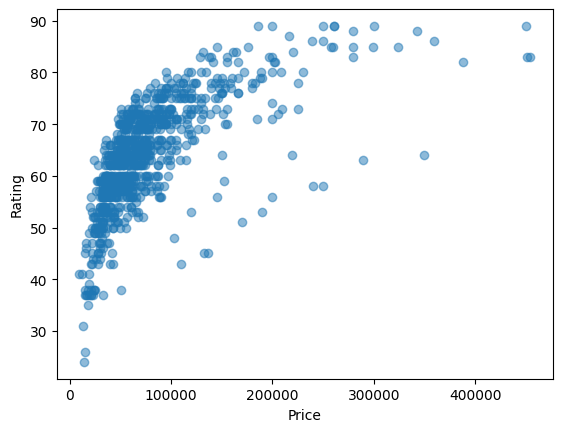

In [ ]:
plt.scatter(data['Price'], data['Rating'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

убеждаемся в наличии зависимости

Выбираем коэффициент Спирмена, так как обе переменные метрические и не распределены нормально.

In [ ]:
picked_data = data.dropna(subset = ['Price', 'Rating'])[['Price', 'Rating']]
corr, p_value = spearmanr(picked_data['Price'], picked_data['Rating'])
print(f"Корреляция Спирмена: {corr}")
print(f"p-value: {p_value}")

Корреляция Спирмена: 0.7640121937328099
p-value: 8.608548697310834e-171


коэффициент корреляции > 0 => связь прямая

коэффициент корреляции = 0.76 => по таблице связь сильная

p-value < 0.05 => связь статически значимая

### Задание 4. Частная корреляция
Посчитайте парный коэффициент корреляции между выбранной парой переменных. Посчитайте частный коэффициент корреляции между этими переменными, исключив влияние любой третьей переменной. Сделайте выводы. Визуализируйте наблюдаемые тенденции на подходящих графиках.

Выберем пару Price и display_size, а третьей переменной возьмем ram_memory

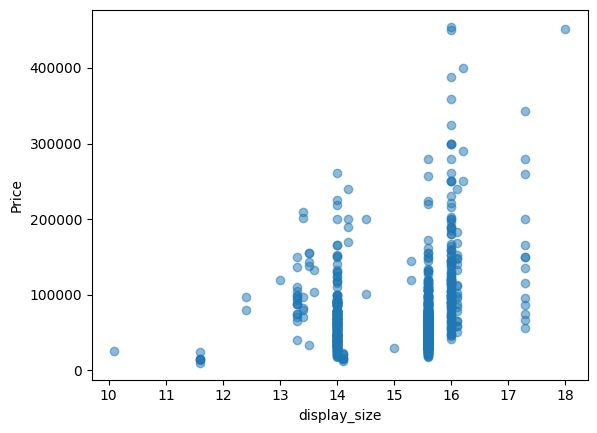

In [ ]:
plt.scatter(data['display_size'], data['Price'], alpha=0.5)
plt.xlabel('display_size')
plt.ylabel('Price')
plt.show()

Убеждаемся в наличии зависимости ( по графику выше ) и считаем коэффициент Спирмена ( так как Price не распр. нормально )

In [ ]:
Считаем коэффициент корреляции между Price и display_size

In [ ]:
picked_data = data.dropna(subset = ['Price', 'display_size'])[['Price', 'display_size']]
corr, p_value = spearmanr(picked_data['Price'], picked_data['display_size'])
print(f"Корреляция Спирмена: {corr}")
print(f"p-value: {p_value}")

Корреляция Спирмена: 0.24204312426063568
p-value: 2.0027608821689293e-13


корреляцию между Price и ram_memory уже считали: 0.68

In [ ]:
picked_data = data.dropna(subset = ['display_size', 'ram_memory'])[['display_size', 'ram_memory']]
corr, p_value = spearmanr(picked_data['display_size'], picked_data['ram_memory'])
print(f"Корреляция Спирмена: {corr}")
print(f"p-value: {p_value}")

Корреляция Спирмена: 0.1836930724908037
p-value: 3.058633297403207e-08


Корреляция между display_size и ram_memory = 0.18

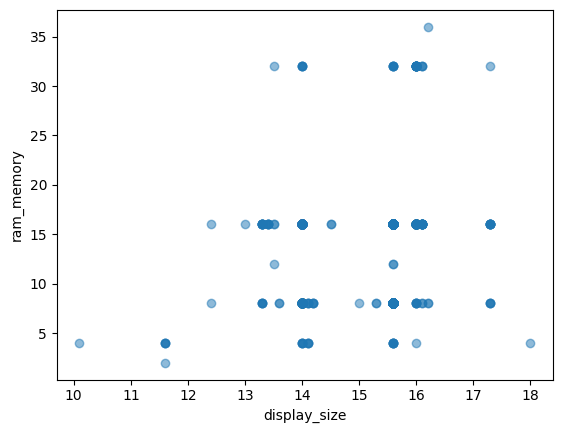

In [ ]:
plt.scatter(data['display_size'], data['ram_memory'], alpha=0.5)
plt.xlabel('display_size')
plt.ylabel('ram_memory')
plt.show()

In [ ]:
r_xy = 0.242 # Корреляция Price и display_size
r_xz = 0.68  # Корреляция Price и ram_memory
r_yz = 0.183 # Корреляция display_size и ram_memory
# Считаем по формуле:
partial_corr = (r_xy - r_xz * r_yz) / np.sqrt((1 - r_xz**2) * (1 - r_yz**2))
# Это Корреляция между Price и display_size без влияния ram_memory
print(partial_corr)

0.16308970486142013


Видим, что корреляция между Price и display size изменилась: уменьшилась. По таблице интерпретирования коэффициента Спирмена связь из слабой/умеренной стала очень слабой. Получается, что ram_memory частично поддерживала или усиливала связь между ценой и размером экрана.